## RandomForest Classifier Implementation With Pipelines And Hyperparameter Tuning

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['time']=encoder.fit_transform(df['time'])

In [ ]:
df['time'].value_counts()

0    176
1     68
Name: time, dtype: int64

In [ ]:
df.shape

(244, 7)

<Axes: >

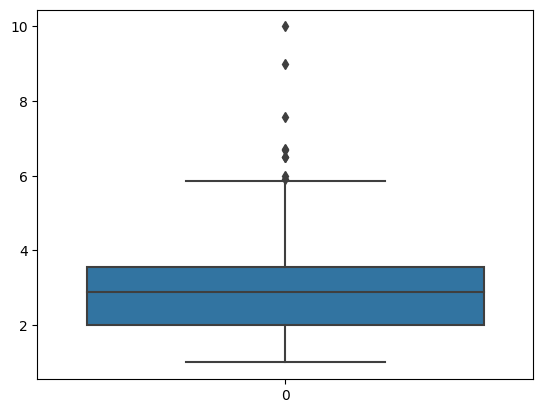

In [ ]:
#check outliers
sns.boxplot(df['tip'])

In [ ]:
median = df['tip'].median()
df.loc[df['tip'] > 10, 'tip'] = median

Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['tip'] > Q1 - 1.5 * IQR) & (df['tip'] < Q3 + 1.5 * IQR)]




In [ ]:
df.shape

(235, 7)

In [ ]:
## independent and dependent features
X=df.drop(labels=['time'],axis=1)
y=df['time']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer ## Handling Missing Values
from sklearn.preprocessing import OneHotEncoder## handling Categorical features
from sklearn.preprocessing import StandardScaler## Feature scaling
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
## Automating the process

In [ ]:
categorical_cols = ['sex', 'smoker','day']
numerical_cols = ['total_bill', 'tip','size']

In [ ]:
## Feature Engineering Automation
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='mean')), ##missing values
        ('scaler',StandardScaler())## feature scaling
    ]

)

#categorical Pipeline
cat_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')), ## handling Missing values
                ('onehotencoder',OneHotEncoder()) ## Categorical features to numerical
                ]

            )


In [ ]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)

])

In [ ]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
## Automate Model Training Process
models={
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVC':SVC()

}

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def evaluate_model(X_train,y_train,X_test,y_test,models):

    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)



        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction

        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score



    return report

In [ ]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 1.0, 'Decision Tree': 0.9787234042553191, 'SVC': 1.0}

In [ ]:
classifier=RandomForestClassifier()

In [ ]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy']
              }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.974 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.947 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.974 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.865 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=300;, score=0.973 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=300;, score=0.974 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=300;, score=0.947 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=300;, score=0.947 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=300;, score=0.865 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=300;, score=0.973 tot

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [ ]:
cv.best_params_

{'n_estimators': 200, 'max_depth': 3, 'criterion': 'entropy'}

In [ ]:
## Prediction
y_pred=cv.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


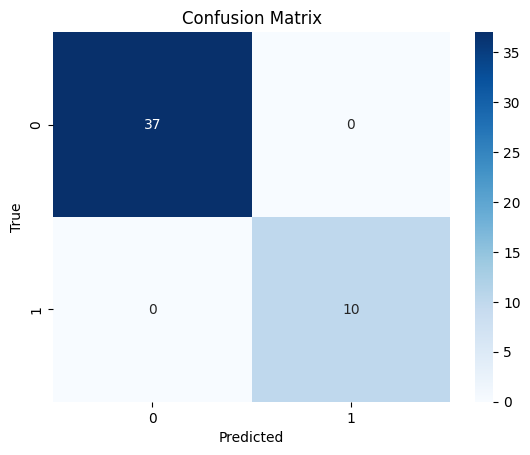

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

# Assuming you have a trained Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=3, criterion='entropy')
rf_clf.fit(X_train, y_train)  # Train the Random Forest model

# Loop through each decision tree in the Random Forest
# for i, tree_in_forest in enumerate(rf_clf.estimators_):
#   if i%5==0:
final_tree = rf_clf.estimators_[-1]
dot_data = export_graphviz(final_tree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf(f"final_tree.pdf")  # Save each tree as a separate PDF


True